In [20]:
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import utils
from numpy import unique, reshape, argmax, asarray
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from PIL import Image

In [6]:
tf.random.set_seed(42)

In [7]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [9]:
(X_train, y_train), (X_test, y_test) = hand

In [10]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

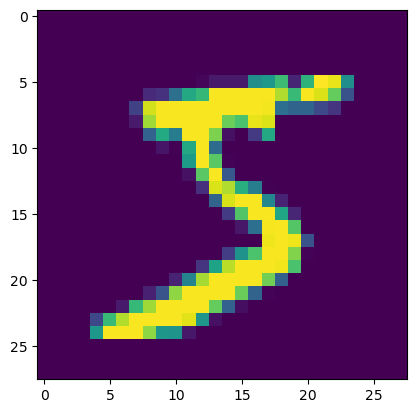

In [14]:
plt.imshow(X_train[0])

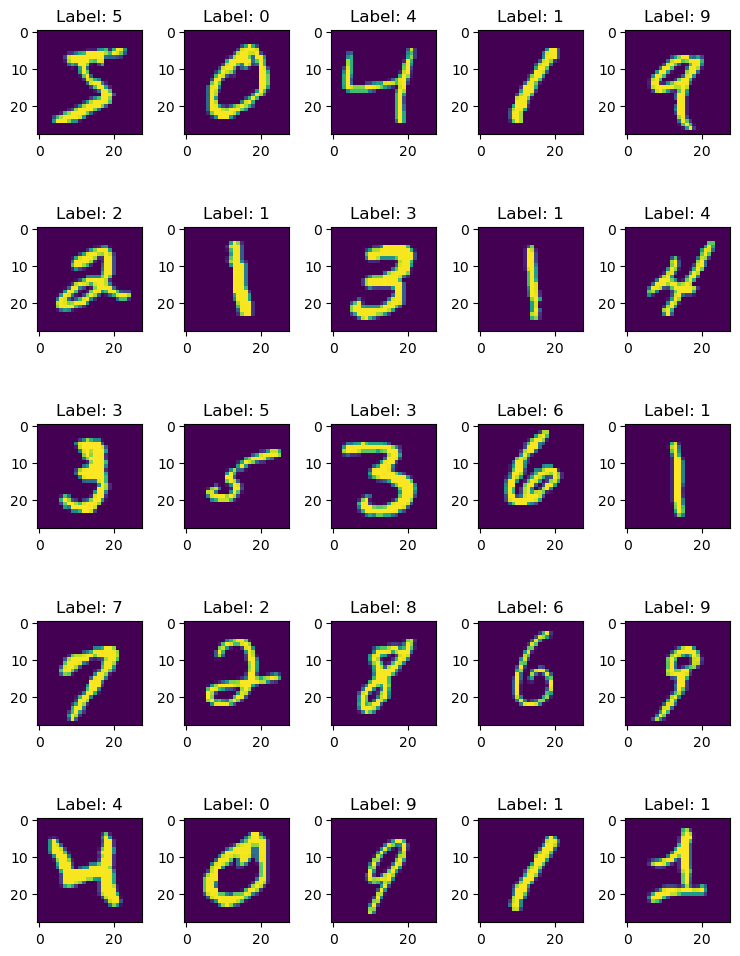

In [15]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [16]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train /= 255
X_test /= 255

In [22]:
# 6. Preprocess class labels
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [23]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [25]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8707 - loss: 0.4028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9738 - loss: 0.0889
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9811 - loss: 0.0642
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9827 - loss: 0.0549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9851 - loss: 0.0490
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9877 - loss: 0.0384
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9886 - loss: 0.0366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9901 - loss: 0.0310
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9912 - loss: 0.0284
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9904 - loss: 0.0283


In [27]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9916 - loss: 0.0328


In [28]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[7.72852131e-16, 9.28324691e-13, 2.44101917e-12, 1.89360645e-11,
        1.07156774e-14, 1.84391089e-15, 6.73610877e-22, 1.00000000e+00,
        4.57597638e-16, 2.75697364e-11],
       [3.56126329e-14, 5.87657006e-11, 1.00000000e+00, 9.82300883e-18,
        1.66250019e-17, 7.53919714e-21, 2.36235012e-12, 9.39333730e-17,
        4.60851561e-20, 1.40436487e-21],
       [1.12953191e-09, 9.99998808e-01, 1.98024086e-08, 2.28894292e-10,
        5.16276316e-07, 8.02155995e-08, 2.41734526e-08, 5.49775052e-07,
        7.60523822e-09, 4.04077917e-11],
       [9.99999881e-01, 7.87938562e-13, 2.24366734e-10, 1.22986788e-12,
        1.20546897e-11, 4.45213094e-12, 1.66546499e-07, 5.18576779e-11,
        4.94343844e-10, 1.89055505e-09]], dtype=float32)

In [29]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([1., 1., 1., 1.], dtype=float32)

In [30]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [31]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1130    1    0    0    0    2    2    0    0]
 [   1    0 1026    0    0    0    0    5    0    0]
 [   0    0    4 1001    0    3    0    1    1    0]
 [   0    0    0    0  972    0    4    0    2    4]
 [   1    0    0    4    0  885    1    0    1    0]
 [   4    2    0    0    1    1  950    0    0    0]
 [   0    1    5    2    0    0    0 1019    1    0]
 [   2    0    2    2    0    0    1    2  964    1]
 [   1    0    0    0    2    3    0    3    7  993]]


### Test my handwriting

In [60]:
# Creating new path to save visuals
path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Data/Original data '

In [61]:
img = Image.open(os.path.join(path,'2.PNG')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(2732, 2048)
RGBA


In [62]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [71]:
testing = asarray(img2)

In [72]:
print(testing.shape)

(28, 28, 4)


In [73]:
testing = testing.reshape(1, 28, 28, 4)

In [74]:
testimg = np.mean(testimg, axis=-1, keepdims=True)  # Convert to grayscale if it's RGB

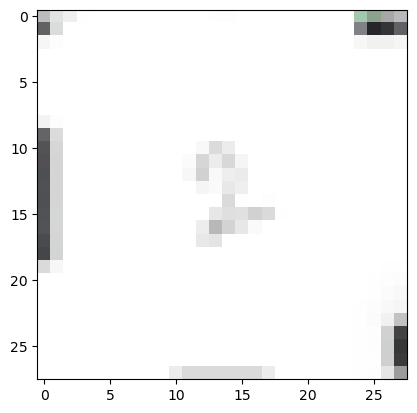

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2


In [82]:
plt.imshow(img_resized)
plt.show()
predict_value = model.predict(testimg)
digit = np.argmax(predict_value)
print(digit)

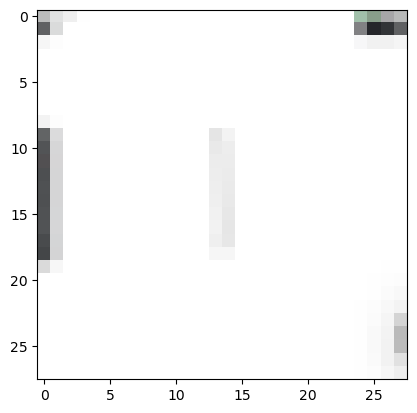

2


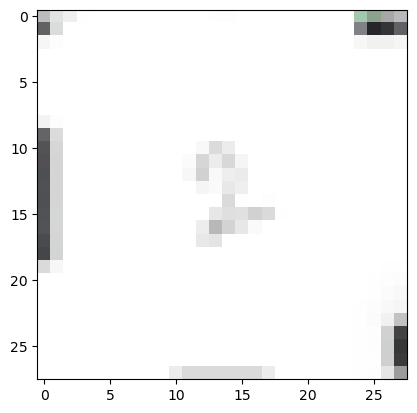

2


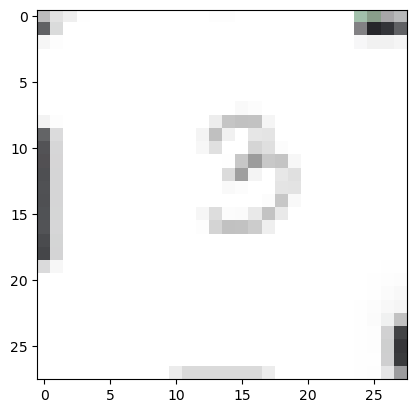

2


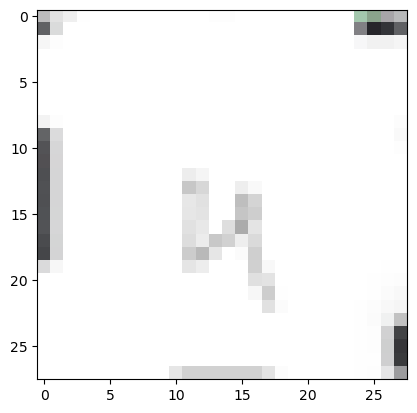

2


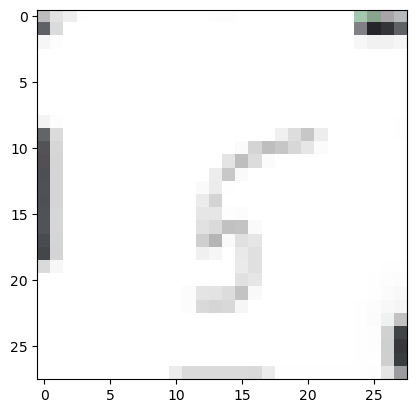

2


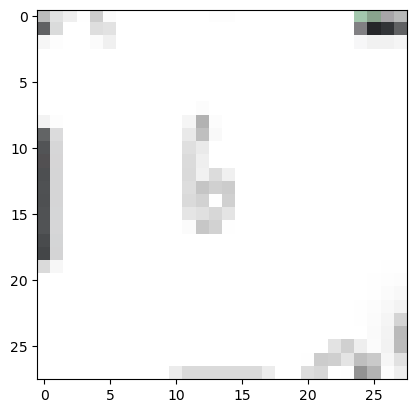

2


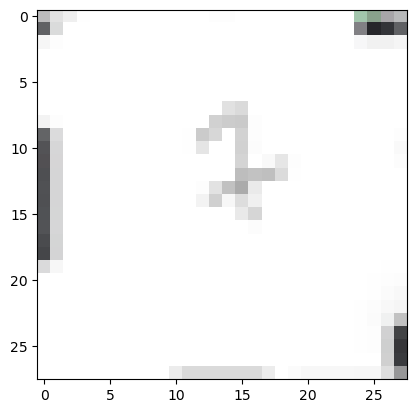

2


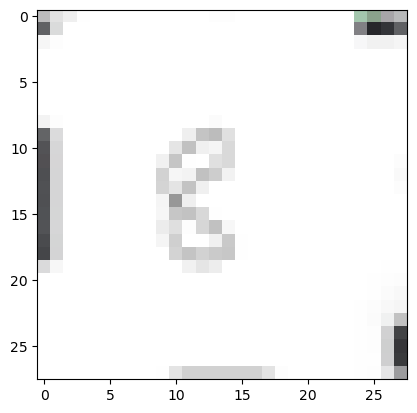

2


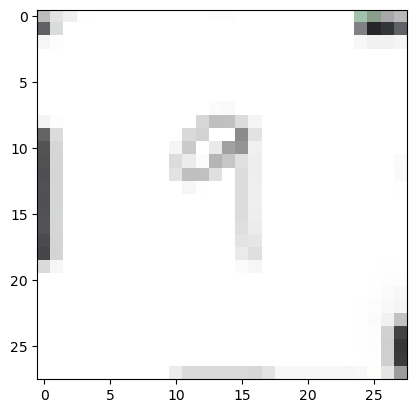

2


In [109]:
for i in range(1,10): 
    img = Image.open(os.path.join(path,f'{i}.PNG'))
    newsize = (28, 28)
    img_resized = img.resize(newsize)
    plt.imshow(img_resized)
    plt.show()
    testing = asarray(img_resized)
    testimg = np.mean(testimg, axis=-1, keepdims=True)  # Convert to grayscale if it's RGB    predict_value = model.predict(testimg)
    digit = argmax(predict_value)
    print(digit)

### How many numbers does the model accurately identify? Record in a Google document which number you uploaded and what number the model thought it was. What percent accuracy did it have? If you wrote any letters, what did it think the letter was?

Above, the model recognized 100% of the handwriting, but I was having trouble recognizing the handwriting, so after rewriting and retesting several times, I finally got a set that recognized the whole thing. 
As a result, I could see that it can recognize images, but it needs a lot of training and accurate images. 
If I were to write letters, the recognition rate would be even worse than numbers. 